# Régression linéaire

Soit le jeu de donnée suivant. 

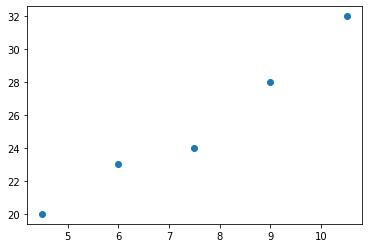

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([4.5, 6., 7.5, 9., 10.5])
y = np.array([20, 23, 24, 28, 32])
plt.plot(x,y,'o');

## Formulation matricielle 

On cherche à ajuster une droite sur les données. 

$$y = a x + b$$

On peut définir un vecteur $\bf{ p}$ contenant les deux paramètres inconnus et une matrice $\bf{G}$ 

$$\bf{ p} = \left[ \begin{array}{c} a \\ b\end{array}\right]  \qquad {\bf G} = \left[ \begin{array}{cc} 4.5 & 1\\ 6. & 1\\ 7.5  & 1\\ 9. & 1\\ 10.5 & 1\end{array}\right] $$


In [2]:
N = len(x)
G = np.ones( (N,2) )
G[:,0] = x

## Pseudo-inverse Moore-Penrose

Le vecteur de paramètre minimisant l'écart au carré s'obtient en multipliant les données par le pseudo-inverse de Moore-Penrose :

$${\bf p} = \left( {\bf G^T} {\bf G} \right) ^{-1} {\bf G^T} {\bf y}$$

In [3]:
p = np.linalg.inv(G.T @ G) @ G.T @ y
print(p)

[ 1.93333333 10.9       ]


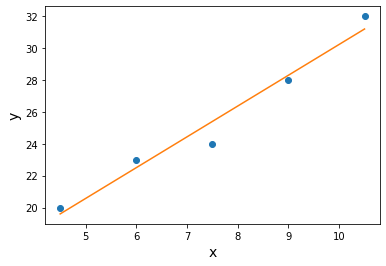

In [4]:
plt.plot(x, y, 'o')
plt.plot(x, G @ p)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.show()

Les paramètres obtenus correspondent au minimum de l'erreur quadratique

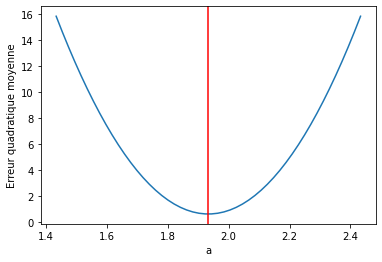

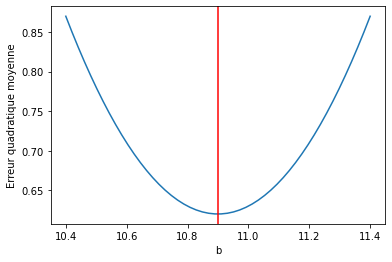

In [5]:
p = np.linalg.inv(G.T @ G) @ G.T @ y

aopt = p[0]
a = np.linspace(aopt-0.5,aopt+0.5)
MSE = np.zeros(len(a))
for i in range(len(a)):
    p = [a[i],10.9]
    yc = G @ p
    MSE[i] = np.mean( (y - yc)**2 )

plt.plot(a,MSE)
plt.axvline(aopt,color='r')
plt.xlabel('a')
plt.ylabel('Erreur quadratique moyenne')
plt.show()

bopt = p[1]
b = np.linspace(bopt-0.5,bopt+0.5)
MSE = np.zeros(len(b))
for i in range(len(b)):
    p = [aopt,b[i]]
    yc = G @ p
    MSE[i] = np.mean( (y - yc)**2 )

plt.plot(b,MSE)
plt.axvline(bopt,color='r')
plt.xlabel('b')
plt.ylabel('Erreur quadratique moyenne')
plt.show()

## Ajustement d'un polynôme 

$$y = a x^2 + b x + c$$

Il faut adapter la matrice ${\bf G}$ pour prendre en compte les termes supplémentaires.

In [6]:
G = np.ones( (N, 3) )
G[:,0] = x**2
G[:,1] = x
print(G)

[[ 20.25   4.5    1.  ]
 [ 36.     6.     1.  ]
 [ 56.25   7.5    1.  ]
 [ 81.     9.     1.  ]
 [110.25  10.5    1.  ]]


In [7]:
p = np.linalg.inv(G.T @ G) @ G.T @ y
print(p)

[ 0.15873016 -0.44761905 19.11428571]


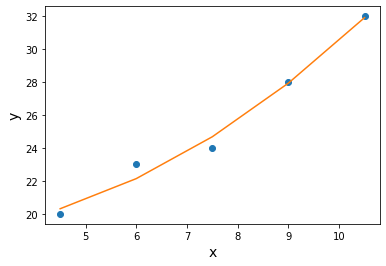

In [8]:
yc = G @ p
plt.plot(x, y, 'o')
plt.plot(x, yc)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.show()

## Régression non-linéaire

Utilisation du module `optimize`dans `scipy`

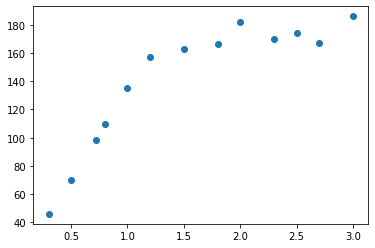

In [9]:
t = np.array((0.3,0.5,0.72,0.8,1,1.2,1.5,1.8,2,2.3,2.5,2.7,3))
n = np.array((46, 70,  98, 110, 135, 157, 163, 166, 182, 170, 174,  167, 186))
plt.plot(t,n,'o');


Modèle de population avec l'équation logistique :

$$ n(t) = \frac{n_{max}}{1+c \cdot \exp(-rt)}$$
avec 
$$ c = \frac{n_{max}-n_0}{n_0}$$

In [10]:
def logistique(t, n0, nmax, r):
    c = (nmax - n0) / n0
    return nmax / (1 + c * np.exp(-r * t))

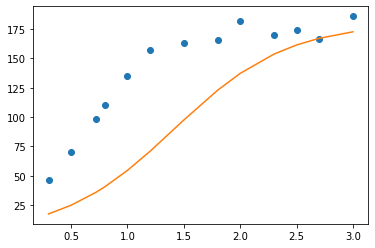

In [11]:
plt.plot(t, n, 'o')
plt.plot(t, logistique(t, 10, 180, 2))

Les paramètres obtenus sont : [ 20.10467848 175.54194408   3.24154009]


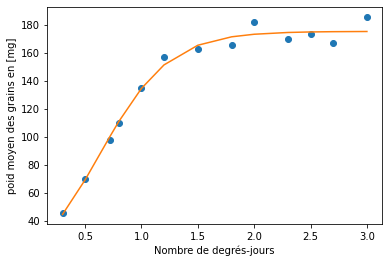

In [12]:
from scipy import optimize
p, C = optimize.curve_fit(logistique, t, n, p0=[10, 180, 2])

print("Les paramètres obtenus sont :", p)
plt.plot(t,n,'o')
plt.plot(t, logistique(t, *p))
plt.ylabel('poid moyen des grains en [mg]')
plt.xlabel('Nombre de degrés-jours');

In [1]:
print(*p)

NameError: name 'p' is not defined